# Activity number 3

Victor BARBE

403715

In [49]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scipy.stats import norm

## matplotlib and warnings configuration

In [50]:
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# warning configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Funcion para graficar una distribución no normalizada y normalizada

In [51]:
def plot_distributions(x, upx, px):
    plt.plot(x, upx, label="unnormalized")
    plt.plot(x, px, label="normalized")
    plt.legend();

In [52]:
Pigmeo = [0, 1]
delta = 1
Altura = np.arange(0, 172.5, delta)
Altura[:20]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

### Define $P(Pigmeo)$

In [53]:
P_Pigmeo = [0.84, 0.16]
P_Pigmeo

[0.84, 0.16]

### Define $P(height | Pigmeo = 0)$

In [54]:
#Define the normal distribution
other_normal = norm(155, 7.5)
#Compute the unormalized probability
pigmeo = other_normal.pdf(Altura) * delta
#Compute the normalized probability
P_Altura_Other = pigmeo/pigmeo.sum()

### Graficar la distribución no normalizada y la distribución normalizada de $P(height | Pigmeo = 0)$

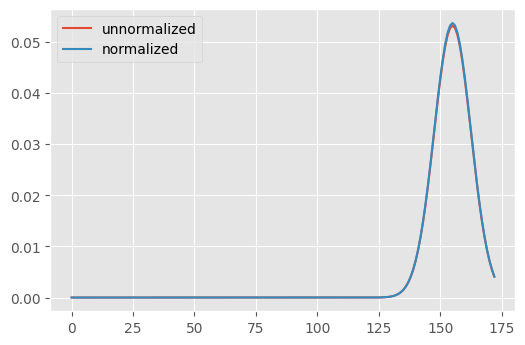

In [55]:
plot_distributions(Altura, pigmeo, P_Altura_Other)

### Definir $P(height | Pigmeo = 1)$

In [56]:
#Define the normal distribution
normal = norm(130, 9.5) #en cm
#Compute the unormalized probability
no_pigmeo = normal.pdf(Altura) * delta #en cm  
#Compute the normalized probability
P_Altura_Pigmeo = no_pigmeo / no_pigmeo.sum()

### Graficar la distribución no normalizada y la distribución normalizada de $P(height | Pigmeo = 1)$

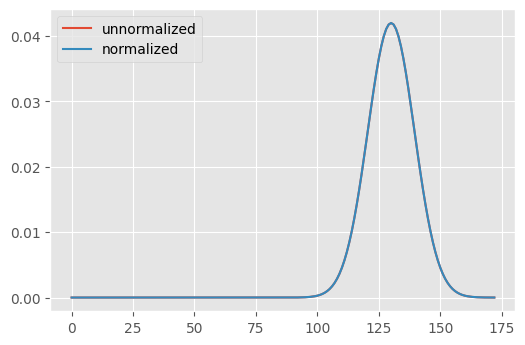

In [57]:
plot_distributions(Altura, no_pigmeo, P_Altura_Pigmeo)

### Definir $P(Altura | Pigmeo)$

In [58]:
P_Altura_knowing_Pigmeo = [P_Altura_Other, P_Altura_Pigmeo]

### Definir la joint distribution 
$P(Pigmeo Altura) = P(Pigmeo)*P(Altura | Pigmeo)$

In [59]:
def Joint_Distribution(cc, tip):
        tip_index = math.floor(tip/delta)
        return P_Pigmeo[cc]*P_Altura_knowing_Pigmeo[cc][tip_index]

###Verify the sum of joint distrib leads to 1

In [60]:
sum = 0.0
for cc in Pigmeo:
    for tip in Altura:
        sum += Joint_Distribution(cc, tip)
sum

0.9999999999999992

### Definir 
$P(Pigmeo | Altura)= \frac{P(Pigmeo)*P(Altura | Pigmeo)}{P(Altura)}=\frac{P(Pigmeo)*P(Altura | Pigmeo)}{\sum_{Pigmeo} P(Pigmeo)*P(Altura | Pigmeo)}$

In [61]:
def P_Pigmeo_Knowing_Altura(credit_card, tip_amount):
    P_Altura = Joint_Distribution(0, tip_amount)+Joint_Distribution(1, tip_amount)
    return float(Joint_Distribution(credit_card, tip_amount)/P_Altura)


### Compute proba of $P(Pigmeo = 1 | Altura)$ for $height \in [0.0,172.5]$

In [62]:
probabilities = []
for tip in Altura:
        probabilities.append(P_Pigmeo_Knowing_Altura(1,tip))

### Graficar las probabilidades previamente calculadas

Text(0, 0.5, 'pigmeo')

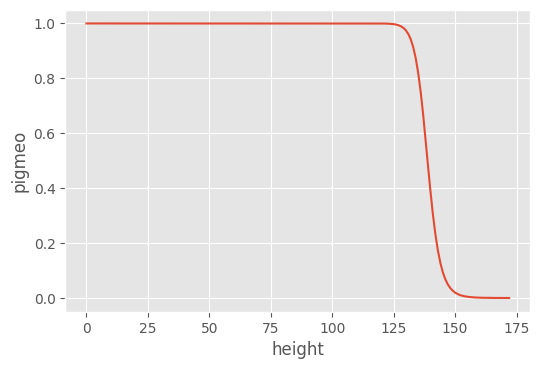

In [71]:
plt.plot(Altura[:300], probabilities[:300])
plt.xlabel("height")
plt.ylabel("pigmeo")


### Probabilidad de altura
### Probability of height

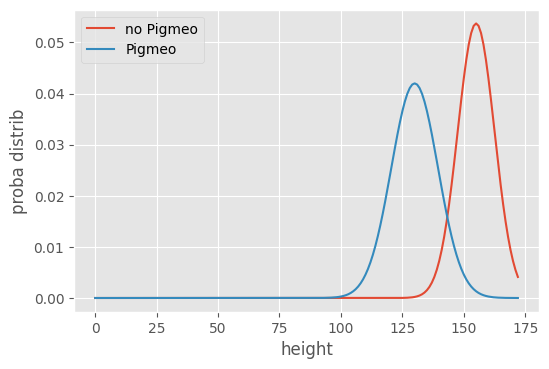

In [69]:
def plot_distributions(x, upx, px):
    plt.plot(x, upx, label="no Pigmeo")
    plt.plot(x, px, label="Pigmeo")
    plt.legend();
    plt.xlabel("height")
    plt.ylabel("proba distrib")

plot_distributions(Altura, P_Altura_Other, P_Altura_Pigmeo)